In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import os
import json

In [10]:
# Veri setini pandas DataFrame'e yükle.
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/pay_gap_Europe.csv")

In [15]:
df.head()

,Country,Year,GDP,Urban_population,Industry,Business,Mining,Manufacturing,Electricity_supply,Water_supply,...,Information,Financial,Real estate,Professional_scientific,Administrative,Public_administration,Education,Human_health,Arts,Other
0,Austria,2010,35390,57.40,24.0,25.2,18.3,24.4,23.6,12.2,...,21.2,30.3,27.0,34.0,22.5,NaN,27.8,12.0,34.0,32.0
1,Austria,2011,36300,57.12,23.5,24.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,2012,36390,57.15,22.9,24.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,2013,36180,57.34,22.3,23.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austria,2014,36130,57.53,22.2,23.8,15.9,23.0,19.8,10.0,...,22.9,30.4,27.8,31.5,19.5,NaN,24.3,12.8,26.6,28.8


In [16]:
df.tail()

,Country,Year,GDP,Urban_population,Industry,Business,Mining,Manufacturing,Electricity_supply,Water_supply,...,Information,Financial,Real estate,Professional_scientific,Administrative,Public_administration,Education,Human_health,Arts,Other
319,Switzerland,2017,60420,73.76,17.6,19.6,8.1,17.1,11.4,3.1,...,22.3,31.1,22.1,23.5,18.2,16.4,10.6,17.1,15.4,15.8
320,Switzerland,2018,61690,73.80,18.6,20.3,9.4,17.3,12.8,4.5,...,24.6,33.1,22.6,25.7,18.2,17.8,13.3,18.1,14.4,18.0
321,Switzerland,2019,61950,73.85,18.6,20.2,9.3,16.4,12.7,4.4,...,24.6,33.1,22.6,26.5,18.1,17.8,13.3,17.1,16.1,19.6
322,Switzerland,2020,60040,73.92,18.4,20.1,7.5,16.9,11.0,2.5,...,22.1,33.6,22.6,27.2,17.9,18.2,13.3,18.8,11.8,15.5
323,Switzerland,2021,62100,74.00,17.7,19.4,8.0,16.1,11.5,3.1,...,21.8,31.5,21.4,26.0,17.7,15.3,12.0,17.4,12.9,16.6


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  324 non-null    object 
 1   Year                     324 non-null    int64  
 2   GDP                      324 non-null    int64  
 3   Urban_population         324 non-null    float64
 4   Industry                 321 non-null    float64
 5   Business                 320 non-null    float64
 6   Mining                   303 non-null    float64
 7   Manufacturing            318 non-null    float64
 8   Electricity_supply       301 non-null    float64
 9   Water_supply             312 non-null    float64
 10  Construction             312 non-null    float64
 11  Retail trade             317 non-null    float64
 12  Transportation           318 non-null    float64
 13  Accommodation            315 non-null    float64
 14  Information              3

In [18]:
df.columns

Index(['Country', 'Year', 'GDP', 'Urban_population', 'Industry', 'Business',
       'Mining', 'Manufacturing', 'Electricity_supply', 'Water_supply',
       'Construction', 'Retail trade', 'Transportation', 'Accommodation',
       'Information', 'Financial', 'Real estate ', 'Professional_scientific',
       'Administrative', 'Public_administration', 'Education', 'Human_health',
       'Arts', 'Other'],
      dtype='object')

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,324.0,2015.500000,3.457392,2010.00,2012.7500,2015.500,2018.250,2021.00
GDP,324.0,28012.438272,19047.046525,5080.00,13045.0000,22330.000,36382.500,84750.00
Urban_population,324.0,73.457747,12.746678,52.66,65.6225,73.275,84.895,98.12
Industry,321.0,13.861994,5.849508,-0.20,9.6000,14.600,17.700,29.90
Business,320.0,16.610312,4.841518,5.40,13.8000,16.000,19.925,30.20
Mining,303.0,9.529373,13.347298,-26.60,2.8000,11.400,16.850,43.70
Manufacturing,318.0,19.256604,6.655569,1.70,14.0500,20.250,24.075,33.60
Electricity_supply,301.0,11.511960,7.183494,-2.00,6.1000,11.300,17.000,49.20
Water_supply,312.0,2.211218,9.392809,-33.20,-2.7250,2.600,8.200,20.90
Construction,312.0,-0.687500,11.098437,-28.30,-8.6250,1.350,8.100,23.50


In [20]:
df.shape

(324, 24)

In [21]:
 df["Country"].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Hungary', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland'],
      dtype=object)

In [22]:
df["Country"].nunique()

27

In [23]:
 df["Year"].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

In [24]:
df.sort_values("Urban_population")

,Country,Year,GDP,Urban_population,Industry,Business,Mining,Manufacturing,Electricity_supply,Water_supply,...,Information,Financial,Real estate,Professional_scientific,Administrative,Public_administration,Education,Human_health,Arts,Other
276,Slovenia,2010,17750,52.66,0.9,6.9,16.5,12.9,5.6,-16.3,...,14.6,22.8,8.9,13.9,12.7,5.5,9.7,19.0,20.1,36.8
277,Slovenia,2011,17870,52.88,3.3,8.1,16.5,13.6,1.0,-15.6,...,14.0,22.2,7.3,11.0,11.0,5.0,10.7,18.9,19.6,32.5
278,Slovenia,2012,17360,53.11,4.5,7.9,17.0,13.4,3.3,-12.6,...,14.3,21.7,1.1,5.9,8.6,4.9,11.1,19.7,17.0,32.0
279,Slovenia,2013,17160,53.33,6.3,8.5,14.3,13.9,-0.8,-8.3,...,14.2,22.5,-5.6,1.8,7.4,3.5,12.3,19.9,16.2,31.6
280,Slovenia,2014,17620,53.56,7.0,8.5,13.0,13.9,-0.3,-11.6,...,15.0,23.7,-4.5,-0.7,6.4,4.1,13.4,21.8,16.6,28.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,Belgium,2017,35050,97.96,5.8,10.2,-2.6,9.6,10.0,8.4,...,11.4,10.2,8.5,8.0,8.6,NaN,4.7,1.7,0.8,8.9
20,Belgium,2018,35510,98.00,5.8,10.1,-3.1,10.7,6.1,11.8,...,11.2,6.9,10.1,5.5,8.6,NaN,5.1,2.6,0.7,4.4
21,Belgium,2019,36110,98.04,5.8,9.9,-3.3,10.4,5.9,11.8,...,11.0,6.6,9.9,5.2,8.4,NaN,5.0,2.3,0.5,4.0
22,Belgium,2020,34010,98.08,5.3,9.5,-3.5,10.2,5.7,11.6,...,10.8,6.4,9.6,5.0,8.1,NaN,5.0,2.3,0.4,3.8


In [25]:
df.replace('Na', np.nan, inplace=True)

In [26]:
# GSYİH(Gayri safi yurt içi hasıla) sütunu için bazı temel istatistikleri hesaplayın
print('GDP statistics:')
print('Mean:', np.mean(df['GDP']))
print('Median:', np.median(df['GDP']))
print('Standard deviation:', np.std(df['GDP']))

GDP statistics:
Mean: 28012.438271604937
Median: 22330.0
Standard deviation: 19017.630219832554


In [27]:
# verileri yıllara göre gruplandırılması ve her yıl için Sanayi ve İşletme alanında maaş farkı  (%) hesaplanması
grouped = df.groupby('Year').mean()[['Industry', 'Business']]

<ipython-input-27-8a3f511c1c92>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('Year').mean()[['Industry', 'Business']]


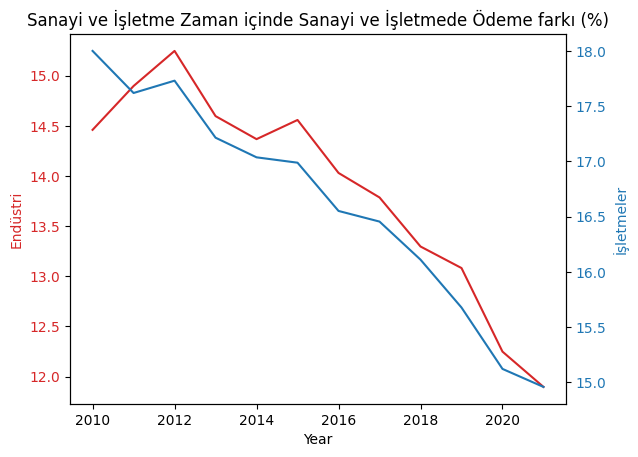

In [48]:
# Yıl bazında Sanayi ve İşletme alanında maaş farkı(%)'nın bir çizgi grafiğinin oluşturulması
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Endüstri', color=color)
ax1.plot(grouped.index, grouped['Industry'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('İşletmeler', color=color)
ax2.plot(grouped.index, grouped['Business'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Sanayi ve İşletme Zaman içinde Sanayi ve İşletmede Ödeme farkı (%)')
plt.show()

<ipython-input-29-4f9ee618e8dd>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby('Year').mean()


         Country  Year    GDP  Urban_population  Industry  Business  Mining  \
0        Austria  2010  35390             57.40      24.0      25.2    18.3   
1        Austria  2011  36300             57.12      23.5      24.7     NaN   
2        Austria  2012  36390             57.15      22.9      24.3     NaN   
3        Austria  2013  36180             57.34      22.3      23.8     NaN   
4        Austria  2014  36130             57.53      22.2      23.8    15.9   
..           ...   ...    ...               ...       ...       ...     ...   
319  Switzerland  2017  60420             73.76      17.6      19.6     8.1   
320  Switzerland  2018  61690             73.80      18.6      20.3     9.4   
321  Switzerland  2019  61950             73.85      18.6      20.2     9.3   
322  Switzerland  2020  60040             73.92      18.4      20.1     7.5   
323  Switzerland  2021  62100             74.00      17.7      19.4     8.0   

     Manufacturing  Electricity_supply  Water_suppl

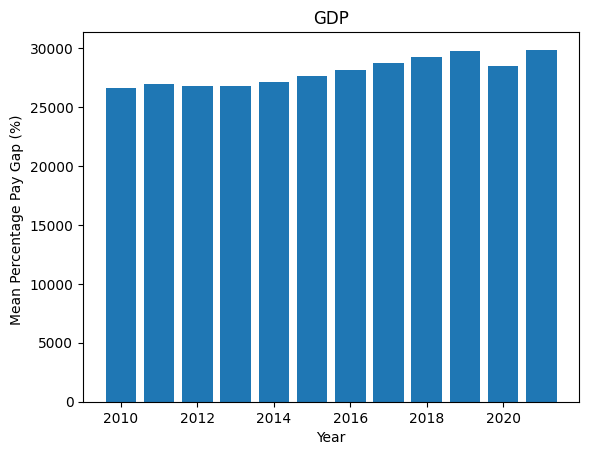

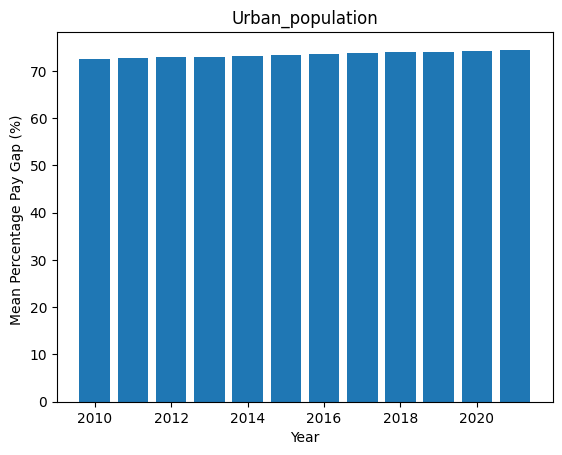

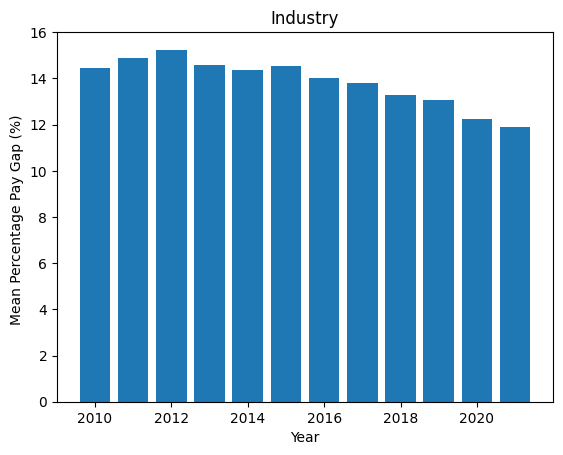

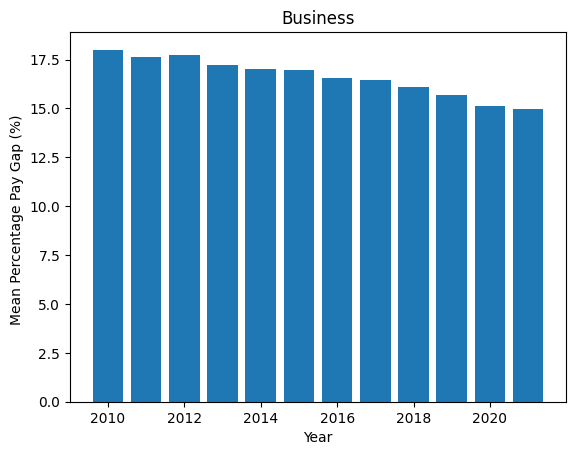

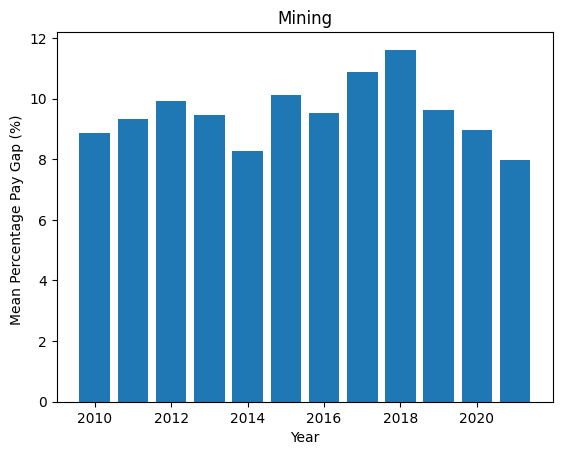

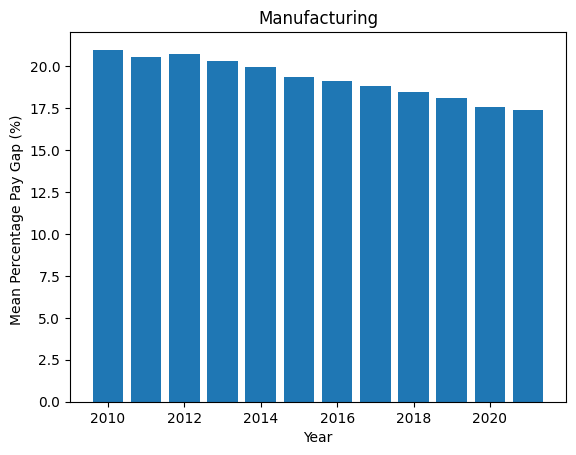

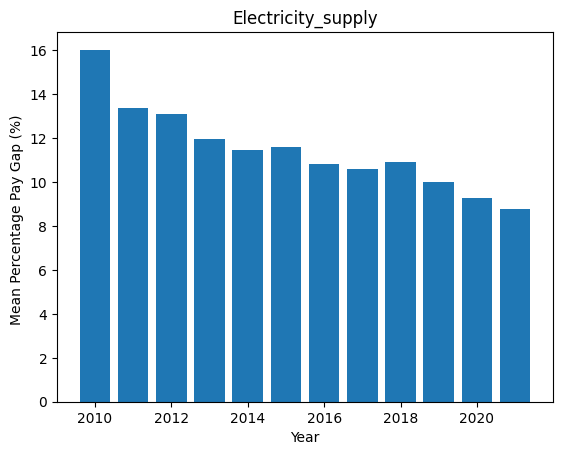

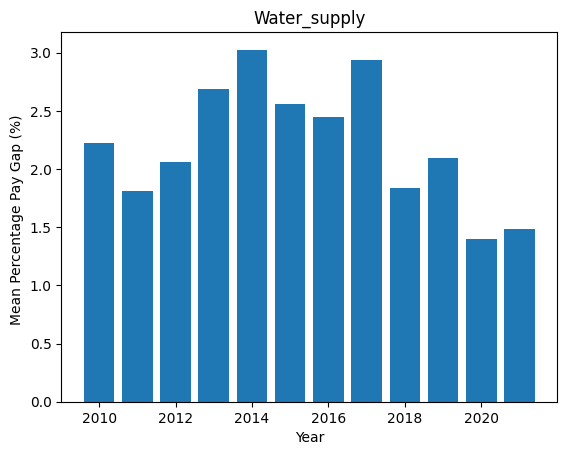

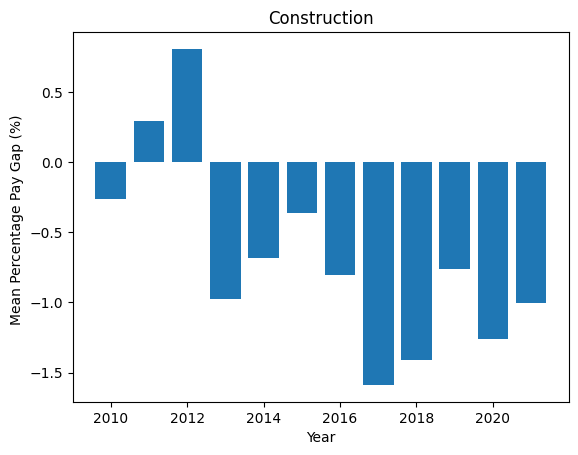

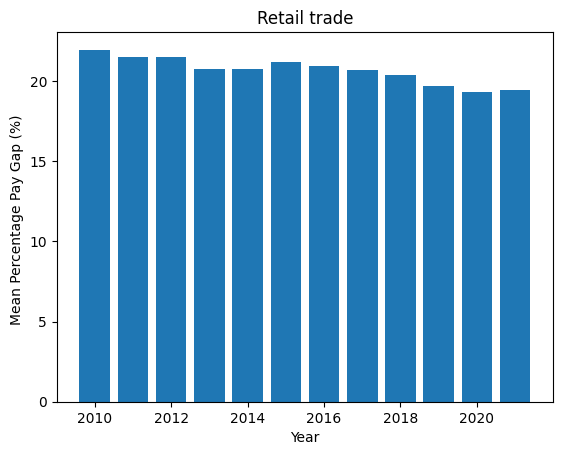

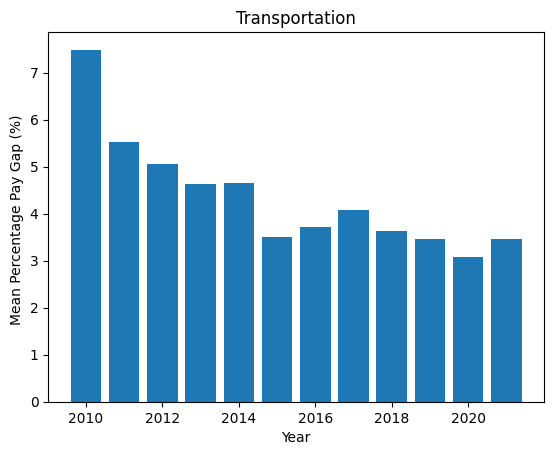

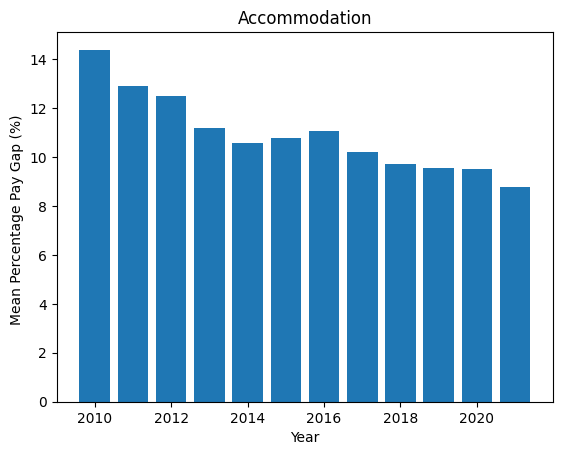

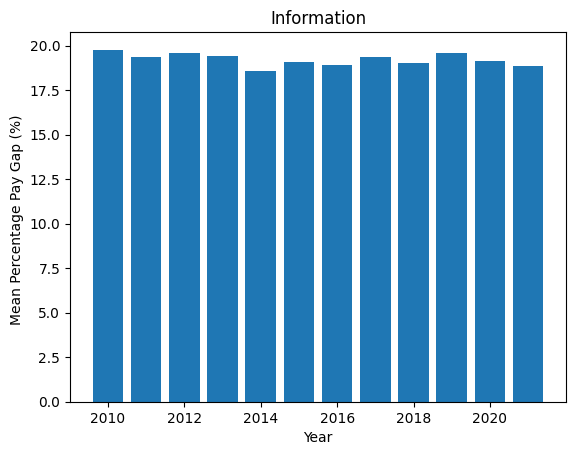

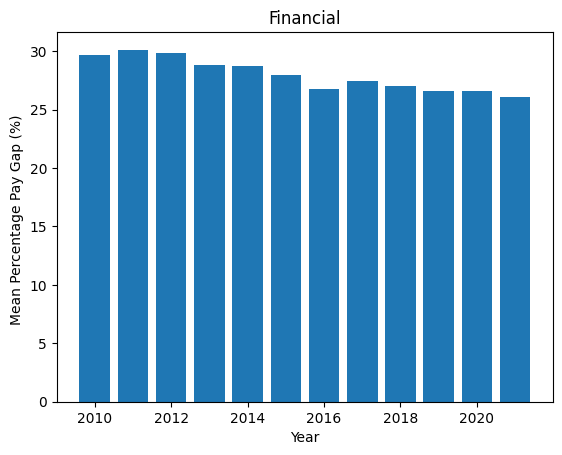

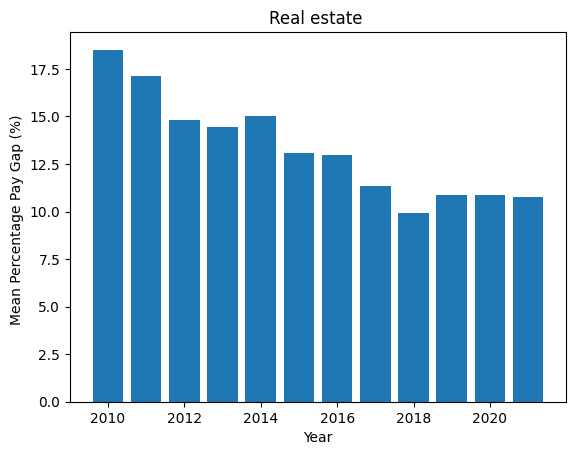

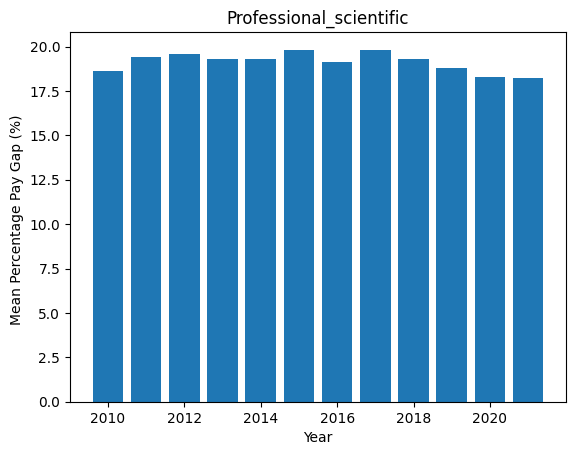

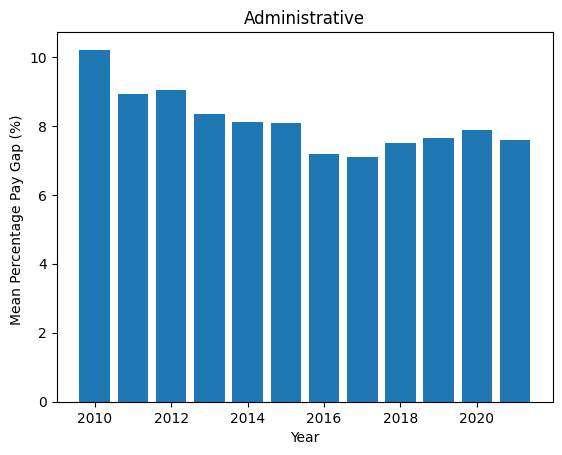

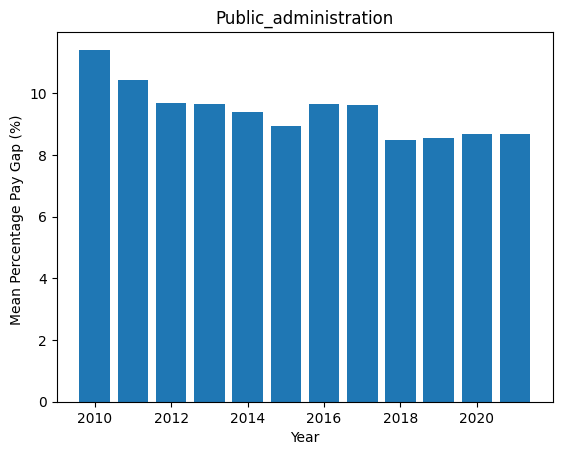

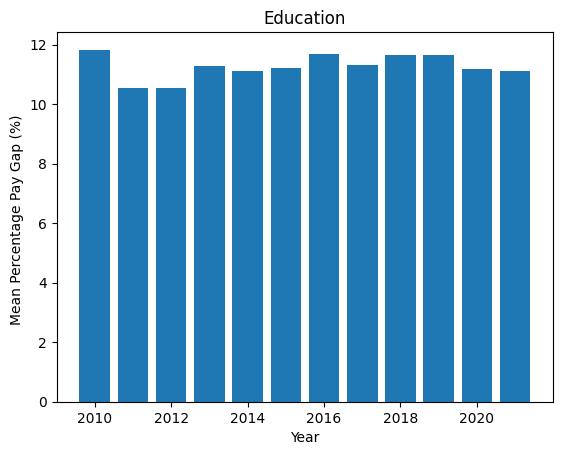

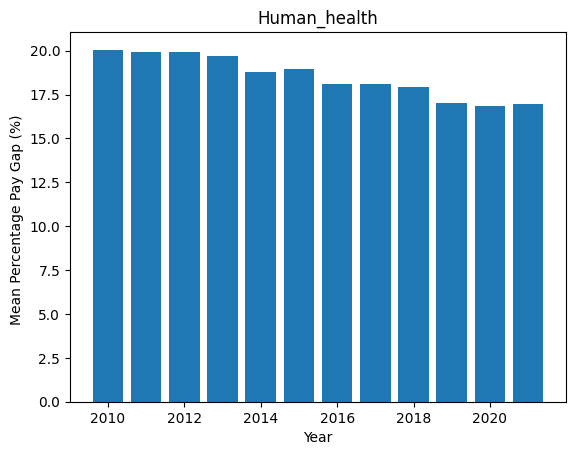

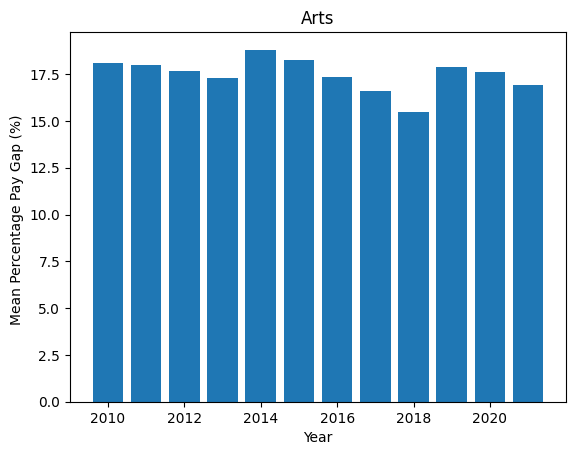

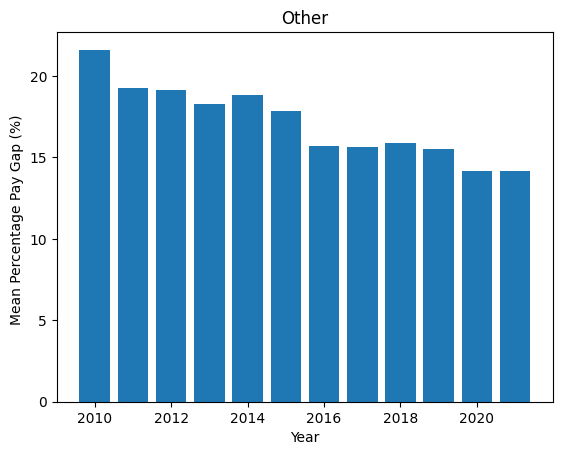

In [29]:
# İlgili sütunların seçilmesi
cols = ['Year','Industry', 'Business', 'Mining', 'Manufacturing', 'Electricity_supply', 'Water_supply',
        'Information', 'Financial', 'Professional_scientific', 'Administrative',
        'Public_administration', 'Education', 'Human_health', 'Arts', 'Other']
# Yıllara göre gruplayın ve her endüstri sektörü için ortalama değerleri
df_mean = df.groupby('Year').mean()
print(df)

# Her yıl için bir bar grafiği oluşturulması
for col in df_mean.columns:
    fig, ax = plt.subplots()
    ax.bar(df_mean.index, df_mean[col])
    ax.set_xlabel('Year')
    ax.set_ylabel('Mean Percentage Pay Gap (%) ')
    ax.set_title(col)
    plt.show()

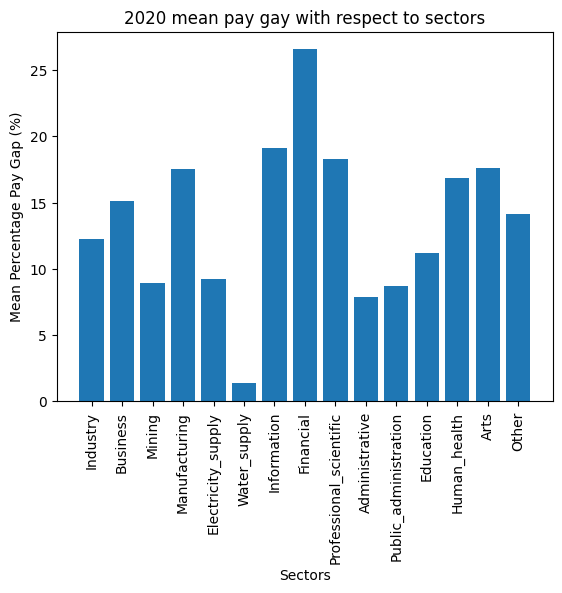

In [30]:
df_2020 = df.loc[df['Year'] == 2020] # yıl olarak 2020 seçilmesi
cols = ['Industry', 'Business', 'Mining', 'Manufacturing', 'Electricity_supply', 'Water_supply',
        'Information', 'Financial', 'Professional_scientific', 'Administrative',
        'Public_administration', 'Education', 'Human_health', 'Arts', 'Other'] # Select the columns of interest
means = df_2020[cols].mean() # Her endüstri sektörü için ortalama değerler

plt.bar(cols, means) # Her sektör için bir çubuk grafiği oluşturulması
plt.xticks(rotation=90) # X axis translate to y axis
plt.title('2020 mean pay gay with respect to sectors') # Grafik başlığı
plt.xlabel('Sectors') # X axis title
plt.ylabel('Mean Percentage Pay Gap (%)') 
plt.show()

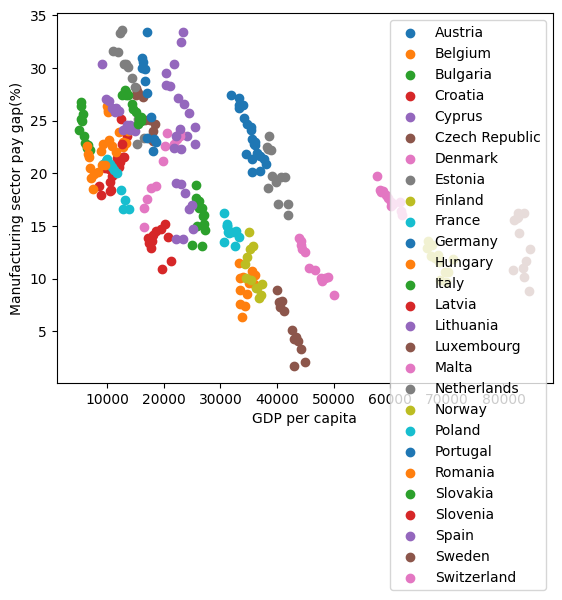

In [52]:
for country in df["Country"].unique():
    country_df = df.loc[df["Country"] == country]
    plt.scatter(country_df["GDP"], country_df["Manufacturing"], label=country)

plt.xlabel("GDP per capita")
plt.ylabel("Manufacturing sector pay gap(%)")
plt.legend()
plt.show()

In [74]:
df1 = pd.DataFrame(df)

ortalama =df1.iloc[:, 3:].mean(axis=1)
new_data_set = pd.DataFrame()
# df data setinin ilk 3 sütununu new_data_set'e eklemek
new_data_set[['Country', 'Year', 'GDP','Urban_population']] = df[['Country', 'Year', 'GDP','Urban_population']]

# df.iloc[:, 3:].mean(axis=1) ile oluşturulmuş data setini new_data_set'e ekle
new_data_set['Mean of Pay Gap Coloumns'] = df.iloc[:, 3:].mean(axis=1)
print(new_data_set)



         Country  Year    GDP  Urban_population  Mean of Pay Gap Coloumns
0        Austria  2010  35390             57.40                 24.025000
1        Austria  2011  36300             57.12                 35.106667
2        Austria  2012  36390             57.15                 34.783333
3        Austria  2013  36180             57.34                 34.480000
4        Austria  2014  36130             57.53                 22.321500
..           ...   ...    ...               ...                       ...
319  Switzerland  2017  60420             73.76                 18.721905
320  Switzerland  2018  61690             73.80                 19.609524
321  Switzerland  2019  61950             73.85                 19.678571
322  Switzerland  2020  60040             73.92                 19.029524
323  Switzerland  2021  62100             74.00                 18.561905

[324 rows x 5 columns]


<Axes: xlabel='Year', ylabel='Mean of Pay Gap Coloumns'>

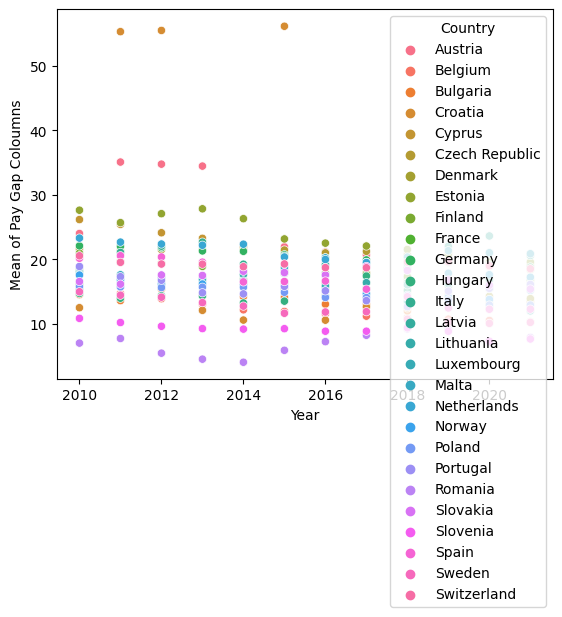

In [90]:
sns.scatterplot(data=new_data_set , x="Year", y="Mean of Pay Gap Coloumns", hue="Country")

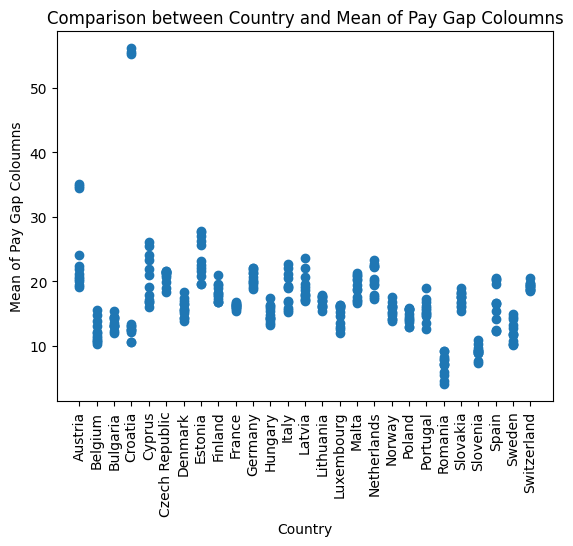

In [85]:
# scatter grafiği oluşturulması 
plt.scatter(new_data_set['Country'], new_data_set['Mean of Pay Gap Coloumns'])

# başlıkların eklenmesi
plt.xlabel('Country')
plt.ylabel('Mean of Pay Gap Coloumns')
plt.title('Comparison between Country and Mean of Pay Gap Coloumns')

# Çakışmayı önlemek için x ekseni etiketlerini döndürülmesi
plt.xticks(rotation=90)

# Grafiğin gösterilmesi
plt.show()

In [32]:
print(business_data)

            Country  Business
10          Austria      20.7
22          Belgium       9.5
34         Bulgaria      13.2
46          Croatia      12.8
58           Cyprus      17.2
70   Czech Republic      12.8
82          Denmark      14.1
94          Estonia      23.0
106         Finland      16.5
118          France      13.3
130         Germany      21.6
142         Hungary      15.2
154           Italy      13.8
166          Latvia      23.1
178       Lithuania      15.9
190      Luxembourg      10.5
202           Malta      13.7
214     Netherlands      19.9
226          Norway      15.7
238          Poland      12.4
250        Portugal      15.1
262         Romania      10.1
274        Slovakia      18.1
286        Slovenia       7.4
298           Spain      14.7
310          Sweden       7.9
322     Switzerland      20.1


In [46]:
# Bir harita nesnesi oluşturulması
m = folium.Map(location=[0, 0], zoom_start=2)

# Haritaya bir choropleth katmanı eklenilmesi
folium.Choropleth(
    geo_data=json.load(open('/content/gdrive/MyDrive/Colab Notebooks/world-countries.json')),
    name='choropleth',
    data=df,
    columns=['Country', 'Business'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Business 2020'
).add_to(m)

folium.LayerControl().add_to(m)

# Haritayı göstermek için 
m